In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
df=pd.read_csv('Laundry_Data.csv')

# Data Cleaning

In [4]:
#df.info()
df

,No,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles
0,1,19/10/2015,20:17:50,malay,NaN,moderate,NaN,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no
1,2,19/10/2015,20:28:42,indian,male,thin,32.0,no,no_kids,big,green,casual,NaN,short_sleeve,blue_jeans,long,NaN,6,9,no
2,3,19/10/2015,20:58:31,malay,female,NaN,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,NaN,4,10,no
3,4,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,casual,NaN,short_sleeve,yellow,short,clothes,5,9,no
4,5,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,09/12/2015,20:05:46,malay,female,moderate,45.0,NaN,no_kids,small,white,casual,red,long sleeve,black,long,clothes,3,10,no
803,804,09/12/2015,20:33:01,malay,male,fat,34.0,no,no_kids,big,grey,casual,white,short_sleeve,black,long,blankets,3,7,no
804,805,09/12/2015,20:37:01,malay,female,moderate,53.0,no,no_kids,big,purple,traditional,pink,long sleeve,pink,long,clothes,3,7,yes
805,806,09/12/2015,20:42:57,indian,female,moderate,37.0,no,no_kids,big,green,traditional,brown,short_sleeve,black,long,clothes,6,10,no


In [5]:
#age range clean(mean value)
df['Age_Range']=df['Age_Range'].fillna(round(df['Age_Range'].mean()))

df["With_Kids"] = np.where(df["Kids_Category"]!='no_kids',df['With_Kids'],'no')
df["With_Kids"] = np.where(df["Kids_Category"]=='no_kids',df['With_Kids'],'yes')

df["Kids_Category"] = np.where(df["With_Kids"]=='yes',df['Kids_Category'],'no_kids')
#df=df.fillna('Unknown')

In [6]:
len(df[df.isnull().any(axis=1)])/len(df)*100

60.84262701363073

In [7]:
df.isnull().sum()


No                0
Date              0
Time              0
Race             55
Gender           91
Body_Size        98
Age_Range         0
With_Kids         0
Kids_Category    30
Basket_Size      55
Basket_colour    90
Attire           31
Shirt_Colour     87
shirt_type       37
Pants_Colour      5
pants_type       95
Wash_Item        89
Washer_No         0
Dryer_No          0
Spectacles        0
dtype: int64

In [8]:
print('Race\n',df['Race'].value_counts())
print('Gender\n',df['Gender'].value_counts())
print('Body_Size\n',df['Body_Size'].value_counts())
print('With_Kids\n',df['With_Kids'].value_counts())
print('Kids_Category\n',df['Kids_Category'].value_counts())



Race
 indian        227
malay         222
chinese       221
foreigner      82
Name: Race, dtype: int64
Gender
 female    361
male      355
Name: Gender, dtype: int64
Body_Size
 fat         247
moderate    237
thin        225
Name: Body_Size, dtype: int64
With_Kids
 no     603
yes    204
Name: With_Kids, dtype: int64
Kids_Category
 no_kids     603
young        90
toddler      47
baby         36
toddler       1
Name: Kids_Category, dtype: int64


count    807.000000
mean      42.040892
std        7.758262
min       28.000000
25%       36.000000
50%       42.000000
75%       49.000000
max       55.000000
Name: Age_Range, dtype: float64


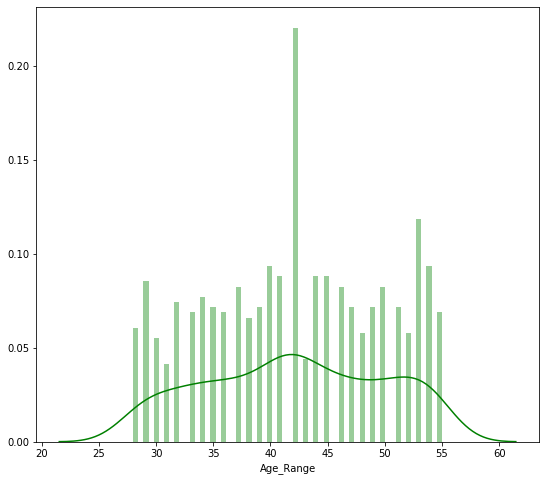

In [9]:
print(df['Age_Range'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Age_Range'], color='g', bins=60, hist_kws={'alpha': 0.4});

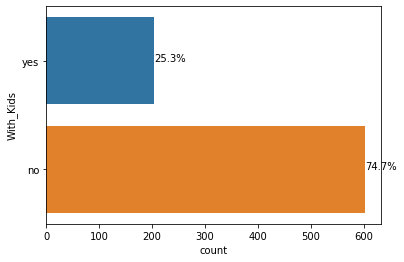

In [15]:
ax=sns.countplot(data = df, y = 'With_Kids')
total = len(df['With_Kids'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
